In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression #Helps us to make a dataset using this methiod

In [2]:
# Regression with neural networks
# We make our own data
data = make_regression(n_samples = 1000, n_features = 5, noise = 0.2, random_state = 42)
data[1].shape

(1000,)

In [3]:
x = data[0]
y = data[1]
y[0]

74.8638525346159

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
X_train.shape

(800, 5)

In [9]:
y_train.shape

(800,)

In [10]:
#First way: Sequential means the layers have sequence
model = tf.keras.models.Sequential(
[tf.keras.layers.Input(shape=(5, )),#number of features
 tf.keras.layers.Dense(units=16, activation='relu'),
 tf.keras.layers.Dense(units= 16, activation='relu'),
 tf.keras.layers.Dense(units=1, activation='linear')
]
    
)
#We make layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Second way
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(5, )))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units= 16, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile the model
loss = tf.losses.MeanSquaredError()
opt = tf.optimizers.Adam()
model.compile(loss=loss, optimizer=opt)

model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
15/15 - 2s - loss: 4296.4912 - val_loss: 3051.4485 - 2s/epoch - 110ms/step
Epoch 2/100
15/15 - 0s - loss: 4274.7183 - val_loss: 3034.2495 - 97ms/epoch - 6ms/step
Epoch 3/100
15/15 - 0s - loss: 4251.8691 - val_loss: 3014.7976 - 98ms/epoch - 7ms/step
Epoch 4/100
15/15 - 0s - loss: 4227.0146 - val_loss: 2990.5034 - 96ms/epoch - 6ms/step
Epoch 5/100
15/15 - 0s - loss: 4197.4077 - val_loss: 2961.7012 - 79ms/epoch - 5ms/step
Epoch 6/100
15/15 - 0s - loss: 4161.6611 - val_loss: 2925.4331 - 83ms/epoch - 6ms/step
Epoch 7/100
15/15 - 0s - loss: 4117.9600 - val_loss: 2879.7046 - 90ms/epoch - 6ms/step
Epoch 8/100
15/15 - 0s - loss: 4064.5847 - val_loss: 2822.6497 - 102ms/epoch - 7ms/step
Epoch 9/100
15/15 - 0s - loss: 3999.1614 - val_loss: 2753.7446 - 96ms/epoch - 6ms/step
Epoch 10/100
15/15 - 0s - loss: 3919.6284 - val_loss: 2671.7708 - 88ms/epoch - 6ms/step
Epoch 11/100
15/15 - 0s - loss: 3824.0833 - val_loss: 2577.1255 - 98ms/epoch - 7ms/step
Epoch 12/100
15/15 - 0s - loss: 3711.092

In [13]:
model.evaluate(X_train, y_train)

25/25 [==============================] - 0s 3ms/step - loss: 29.9232


29.9232234954834

In [14]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 30.8218


30.821815490722656

In [15]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [16]:
y_pred.shape

(200, 1)

In [17]:
y_test.shape

(200,)

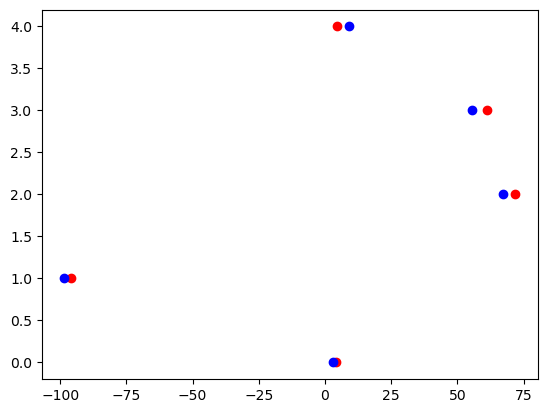

In [18]:
#Comparison between y_pred and y_test
plt.scatter(y_pred[:5], range(5), color='red')
plt.scatter(y_test[:5], range(5), color='blue')
plt.show()